In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import itertools
import warnings

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("data/[1h]BTCUSDT.csv", 
                 parse_dates=['Start', 'Stop'], 
                 date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)/1000))
df.columns = ["start", "stop", "open", "close", "high", "low", "volume"]


df_new = pd.read_csv("data/[1h]BTCUSDT_part_2.csv", 
                 parse_dates=['Start', 'Stop'], 
                 date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)/1000))
df_new.columns = ["start", "stop", "open", "close", "high", "low", "volume"]

In [3]:
df_simpled = df[::100]

In [4]:
future_dates = [df.tail(1).start + datetime.timedelta(hours=x) for x in range(df_new.open.size)]

### Visualize 

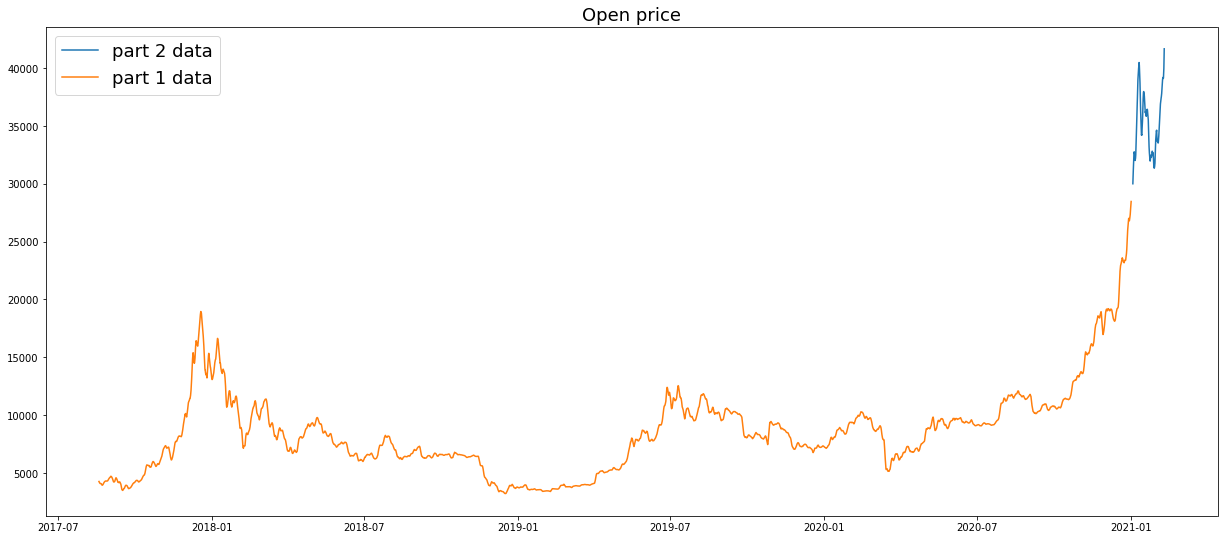

In [5]:
plt.figure(figsize=(21, 9))
plt.plot(df_new.start, df_new.open.rolling(window=50).mean(), label="part 2 data")
plt.plot(df.start, df.open.rolling(window=50).mean(), label="part 1 data")

plt.title("Open price", fontsize=18)
plt.legend(fontsize=18)
plt.show()

### AR

In [6]:
p = 45

model_ar = AutoReg(df.open.values, lags=p, old_names=False).fit()

predict_ar = model_ar.predict(start=len(df.open.values), end=len(df.open.values) + df_new.open.size - 1)

### MA

In [7]:
model_ma = ARIMA(df_new.open.values, order=(0, 0, 3)).fit()

predict_ma = model_ma.predict(start=df.open.size, end=df.open.size + df_new.open.size - 1)

### SES

In [8]:
model_ses = SES(df_new.open, initialization_method="heuristic").fit(smoothing_level=0.1)

predict_ses = model_ses.predict(start=df.open.size, end=df.open.size + df_new.open.size - 1)

### HWES

In [9]:
model_hwes = ExponentialSmoothing(df.open, trend = 'add').fit(smoothing_level=0.01)

predict_hwes = model_hwes.predict(start=df.open.size, end=df.open.size + df_new.open.size - 1)

### ARMA

In [26]:
model_arma = ARIMA(df_simpled.open, order=(1, 0, 2).fit()

predict_arma = model_arma.predict(start=df_simpled.open.size, end=df_simpled.open.size + df_new.open.size - 1)

### ARIMA 

In [51]:
model_arima = ARIMA(df_simpled.open, order=(1, 1, 1)).fit()

predict_arima = model_arima.predict(start=df_simpled.open.size, end=df_simpled.open.size + df_new.open.size - 1)

### SARIMA

In [28]:
model_sarima = SARIMAX(df_simpled.open, order=(1, 2, 1), seasonal_order=(0, 1, 2, 2)).fit()

predict_sarima = model_sarima.predict(start=df_simpled.open.size, end=df_simpled.open.size + df_new.open.size - 1)

# 

### Compare AR, MA, SES, HWES, ARMA, ARIMA and SARIMA

In [31]:
rmse_ar = round(np.sqrt(mean_squared_error(df_new.open, predict_ar)), 2)
rmse_ma = round(np.sqrt(mean_squared_error(df_new.open, predict_ma)), 2)
rmse_ses = round(np.sqrt(mean_squared_error(df_new.open, predict_ses)), 2)
rmse_hwes = round(np.sqrt(mean_squared_error(df_new.open, predict_hwes)), 2)
rmse_arma = round(np.sqrt(mean_squared_error(df_new.open, predict_arma)), 2)
rmse_arima = round(np.sqrt(mean_squared_error(df_new.open, predict_arima)), 2)
rmse_sarima = round(np.sqrt(mean_squared_error(df_new.open, predict_sarima)), 2)

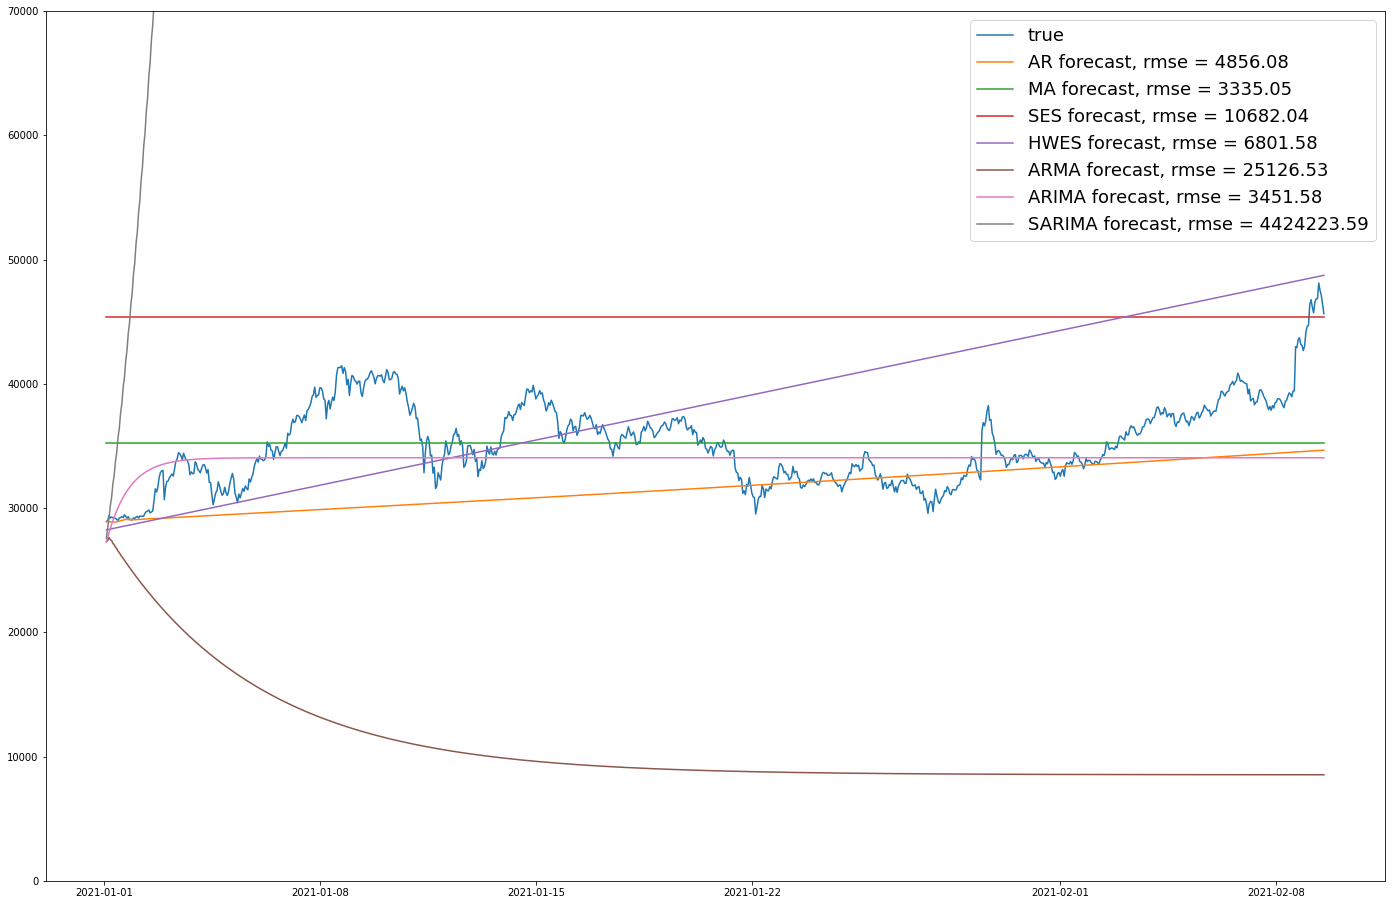

In [52]:
plt.figure(figsize=(24, 16))

plt.plot(df_new.start, df_new.open, label="true")
plt.plot(future_dates, predict_ar, label="AR forecast, rmse = {0}".format(rmse_ar))
plt.plot(future_dates, predict_ma, label="MA forecast, rmse = {0}".format(rmse_ma))
plt.plot(future_dates, predict_ses, label="SES forecast, rmse = {0}".format(rmse_ses)) 
plt.plot(future_dates, predict_hwes, label="HWES forecast, rmse = {0}".format(rmse_hwes)) 
plt.plot(future_dates, predict_arma, label="ARMA forecast, rmse = {0}".format(rmse_arma))
plt.plot(future_dates, predict_arima, label="ARIMA forecast, rmse = {0}".format(rmse_arima))
plt.plot(future_dates, predict_sarima, label="SARIMA forecast, rmse = {0}".format(rmse_sarima))

plt.ylim(bottom=0, top=70000)
plt.legend(fontsize=18)
plt.show()